## Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
data = pd.read_csv(r'parkinsons_train.csv', header=0)

In [3]:
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,156.405,189.398,142.822,0.00768,0.00005,0.00372,0.00399,0.01116,0.03995,0.348,...,0.05164,0.03365,17.153,1,0.649554,0.686080,-4.554466,0.340176,2.856676,0.322111
1,153.848,165.738,65.782,0.00840,0.00005,0.00428,0.00450,0.01285,0.03810,0.328,...,0.05000,0.03871,17.536,1,0.660125,0.704087,-4.095442,0.262564,2.739710,0.365391
2,153.880,172.860,78.128,0.00480,0.00003,0.00232,0.00267,0.00696,0.04137,0.370,...,0.06062,0.01849,19.493,1,0.629017,0.698951,-5.186960,0.237622,2.557536,0.259765
3,167.930,193.221,79.068,0.00442,0.00003,0.00220,0.00247,0.00661,0.04351,0.377,...,0.06685,0.01280,22.468,1,0.619060,0.679834,-4.330956,0.262384,2.916777,0.285695
4,173.917,192.735,86.180,0.00476,0.00003,0.00221,0.00258,0.00663,0.04192,0.364,...,0.06562,0.01840,20.422,1,0.537264,0.686894,-5.248776,0.210279,2.547508,0.253556


In [4]:
data.shape

(96, 23)

In [5]:
data.index

RangeIndex(start=0, stop=96, step=1)

In [6]:
data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### Checking for null values (missing values)

In [7]:
data.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Selecting independent and dependent variables

In [8]:
X = data.loc[:, data.columns != 'status'].values
y = data.loc[:, 'status'].values

In [9]:
X

array([[1.564050e+02, 1.893980e+02, 1.428220e+02, ..., 3.401760e-01,
        2.856676e+00, 3.221110e-01],
       [1.538480e+02, 1.657380e+02, 6.578200e+01, ..., 2.625640e-01,
        2.739710e+00, 3.653910e-01],
       [1.538800e+02, 1.728600e+02, 7.812800e+01, ..., 2.376220e-01,
        2.557536e+00, 2.597650e-01],
       ...,
       [1.746880e+02, 2.400050e+02, 7.428700e+01, ..., 1.584530e-01,
        2.679772e+00, 1.317280e-01],
       [1.987640e+02, 3.969610e+02, 7.490400e+01, ..., 2.074540e-01,
        2.138608e+00, 1.233060e-01],
       [2.142890e+02, 2.602770e+02, 7.797300e+01, ..., 1.906670e-01,
        2.555477e+00, 1.485690e-01]])

### Spliting the dataset for training and testing

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

In [11]:
X_train

array([[2.428520e+02, 2.550340e+02, 2.279110e+02, ..., 1.020830e-01,
        2.365800e+00, 1.027060e-01],
       [1.487900e+02, 1.583590e+02, 1.389900e+02, ..., 1.824590e-01,
        2.251553e+00, 1.603060e-01],
       [2.289690e+02, 2.395410e+02, 1.132010e+02, ..., 6.274000e-03,
        2.118596e+00, 9.154600e-02],
       ...,
       [1.044000e+02, 2.060020e+02, 7.796800e+01, ..., 2.368530e-01,
        2.846369e+00, 2.195140e-01],
       [2.455100e+02, 2.620900e+02, 2.318480e+02, ..., 1.276420e-01,
        2.392122e+00, 9.733600e-02],
       [1.170040e+02, 1.444660e+02, 9.992300e+01, ..., 2.292980e-01,
        1.872946e+00, 1.631180e-01]])

In [12]:
X_test

array([[ 1.172740e+02,  1.299160e+02,  1.104020e+02,  7.520000e-03,
         6.000000e-05,  2.990000e-03,  4.690000e-03,  8.980000e-03,
         2.293000e-02,  2.210000e-01,  1.189000e-02,  1.459000e-02,
         1.948000e-02,  3.568000e-02,  6.810000e-03,  2.281700e+01,
         5.305290e-01,  8.177560e-01, -4.608260e+00,  2.900240e-01,
         2.021591e+00,  3.144640e-01],
       [ 1.468450e+02,  2.087010e+02,  8.173700e+01,  4.960000e-03,
         3.000000e-05,  2.500000e-03,  2.750000e-03,  7.490000e-03,
         1.919000e-02,  1.980000e-01,  8.830000e-03,  1.144000e-02,
         1.826000e-02,  2.650000e-02,  1.328000e-02,  2.511900e+01,
         3.587730e-01,  7.266520e-01, -6.271690e+00,  1.961020e-01,
         2.314209e+00,  1.629990e-01],
       [ 2.022660e+02,  2.116040e+02,  1.970790e+02,  1.800000e-03,
         9.000000e-06,  9.300000e-04,  1.070000e-03,  2.780000e-03,
         9.540000e-03,  8.500000e-02,  4.690000e-03,  6.060000e-03,
         7.190000e-03,  1.407000e-02, 

In [13]:
y_train

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0], dtype=int64)

In [14]:
y_test

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0], dtype=int64)

### Limiting the range of variables -> to compare them commonly

In [15]:
from sklearn.preprocessing import StandardScaler
standard_X = StandardScaler()
standard_X.fit(X_train)
standard_X_rfe = StandardScaler()

In [16]:
X_train = standard_X.transform(X_train)
X_test = standard_X.transform(X_test)

In [17]:
X_train

array([[ 1.75619315,  0.52219892,  1.90311067, ..., -1.31716901,
         0.38359317, -0.82236558],
       [-0.34392729, -0.49828958,  0.20358298, ..., -0.15638479,
         0.02304834, -0.07258327],
       [ 1.44622768,  0.35865686, -0.28931655, ..., -2.70083547,
        -0.39654218, -0.9676359 ],
       ...,
       [-1.33502195,  0.00462362, -0.9627172 , ...,  0.62916931,
         1.90019025,  0.69813045],
       [ 1.81553826,  0.59668112,  1.97835769, ..., -0.94804783,
         0.46666109, -0.89226716],
       [-1.05361269, -0.64494225, -0.54309607, ...,  0.52006056,
        -1.17177336, -0.03597932]])

## XG Boost

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [20]:
score = model.score(X_test, y_test)
print(score)

0.9166666666666666


In [21]:
y_pred = model.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("\n")

print("Classfications Results")
print(classification_report(y_test, y_pred))

print("Accuracy Score")
print(accuracy_score(y_test, y_pred))

Confusion Matrix
[[11  2]
 [ 0 11]]


Classfications Results
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.85      1.00      0.92        11

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24

Accuracy Score
0.9166666666666666


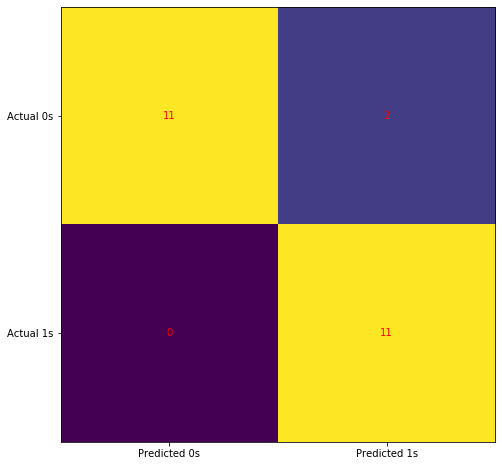

In [22]:
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Saving the model

In [23]:
import joblib
filename = 'XG Boost model.sav'
joblib.dump(model, filename)

['XG Boost model.sav']